# **행정동명 추가 및 석촌동 9월 방문데이터 추출**

In [1]:
'''
import pandas as pd
import os

# 행정동코드 엑셀파일 불러오기 및 필요한 컬럼만 추출
def load_dong_data():
    df_dong = pd.read_excel('행정동코드/KIKcd_H.20240118(말소코드포함).xlsx')
    df_dong = df_dong.loc[:, ['행정동코드', '읍면동명']].dropna().reset_index(drop=True)
    df_dong.rename(columns={'행정동코드': 'hdong_cd', '읍면동명': 'hdong_nm'}, inplace=True)
    return df_dong

# 주어진 csv 파일을 읽고 행정동명을 매칭하여 석촌동 데이터만 추출하는 함수
def process_od_file(file_path, df_dong):
    # OD 데이터 읽기
    df = pd.read_csv(file_path)
    
    # 출발지 행정동명 추가
    df_merged = df.merge(
        df_dong.rename(columns={'hdong_cd': 'origin_hdong_cd', 'hdong_nm': 'origin_hdong_nm'}),
        on='origin_hdong_cd',
        how='left'
    )
    
    # 도착지 행정동명 추가
    df_merged = df_merged.merge(
        df_dong.rename(columns={'hdong_cd': 'dest_hdong_cd', 'hdong_nm': 'dest_hdong_nm'}),
        on='dest_hdong_cd',
        how='left'
    )

    # 병합 후 컬럼명 확인
    print("병합 후 데이터 컬럼:", df_merged.columns)

    # 석촌동만 추출
    df_schon = df_merged[df_merged['dest_hdong_nm'] == '석촌동'].reset_index(drop=True)
    
    return df_schon

# 특정 날짜 범위 내의 파일을 처리하고 병합하는 함수
def process_multiple_od_files(start_day, end_day):
    base_dir = '데이터분석 분야_로우데이터/'
    df_dong = load_dong_data()
    
    all_data = []

    for day in range(start_day, end_day + 1):
        # 날짜에 따라 적절한 디렉토리 선택
        if 1 <= day <= 10:
            dir_name = 'od_20230901_10'
        elif 11 <= day <= 20:
            dir_name = 'od_20230911_20'
        elif 21 <= day <= 30:
            dir_name = 'od_20230921_30'

        for file_num in range(1, 2):  # 파일 번호가 _1로 고정이라서 1번만 처리
            file_name = f'od_202309{str(day).zfill(2)}_1.csv'
            file_path = os.path.join(base_dir, dir_name, file_name).replace("\\", "/")  # 슬래시 문제 수정
            
            # 파일이 존재하는지 확인 후 처리
            if os.path.exists(file_path):
                df_schon = process_od_file(file_path, df_dong)
                all_data.append(df_schon)
            else:
                print(f"파일 {file_path} 이(가) 존재하지 않습니다.")
    
    # 모든 데이터를 하나의 DataFrame으로 병합
    final_df = pd.concat(all_data, ignore_index=True)
    
    return final_df

# 함수 실행: 9월 1일부터 30일까지 데이터 처리
result = process_multiple_od_files(1, 30)

# 결과 저장
#result.to_csv('merged_schon_data.csv', index=False)
'''
print('해결')

해결


In [2]:
# 결과 저장
#result.to_csv('석촌동방문_2309.csv', index=False)

In [17]:
import pandas as pd
# 석촌동 추출 데이터 로드
result = pd.read_csv('석촌동방문_2309.csv')
# 필요한 컬럼만 추출
df_1 = result[['origin_hdong_nm','date','start_time','end_time','gender','age','modal','dest_purpose','od_dist_avg','od_duration_avg','od_cnts']]
df_1

,origin_hdong_nm,date,start_time,end_time,gender,age,modal,dest_purpose,od_dist_avg,od_duration_avg,od_cnts
0,삼전동,20230901,20:00,20:00,0,4,0.0,0,3200,13,7
1,삼전동,20230901,19:00,19:00,1,0,1.0,0,16741,19,23
2,가락1동,20230901,21:00,21:00,0,4,4.0,0,1594,6,20
3,삼전동,20230901,14:00,14:00,1,5,0.0,0,2232,4,7
4,송파1동,20230901,20:00,20:00,1,2,4.0,3,585,2,8
...,...,...,...,...,...,...,...,...,...,...,...
42842,가락1동,20230930,18:00,19:00,0,3,4.0,0,5209,28,5
42843,잠실3동,20230930,13:00,13:00,1,2,0.0,5,8971,13,5
42844,가락1동,20230930,21:00,22:00,1,3,4.0,0,763,3,5
42845,잠실3동,20230930,21:00,22:00,0,2,0.0,0,30274,33,6


In [5]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42847 entries, 0 to 42846
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   origin_hdong_nm  42847 non-null  object 
 1   date             42847 non-null  int64  
 2   start_time       42847 non-null  object 
 3   end_time         42847 non-null  object 
 4   gender           42847 non-null  int64  
 5   age              42847 non-null  int64  
 6   modal            42847 non-null  float64
 7   dest_purpose     42847 non-null  int64  
 8   od_dist_avg      42847 non-null  int64  
 9   od_duration_avg  42847 non-null  int64  
 10  od_cnts          42847 non-null  int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 3.6+ MB


In [6]:
df_1.describe()

,date,gender,age,modal,dest_purpose,od_dist_avg,od_duration_avg,od_cnts
count,4.284700e+04,42847.000000,42847.000000,42847.000000,42847.000000,42847.000000,42847.000000,42847.000000
mean,2.023092e+07,0.541998,3.163232,1.070810,0.644362,11429.711578,20.784606,9.048708
std,8.293655e+00,0.498239,1.729532,1.700468,1.290947,26819.862612,22.968006,7.926737
min,2.023090e+07,0.000000,0.000000,0.000000,0.000000,102.000000,1.000000,5.000000
25%,2.023091e+07,0.000000,2.000000,0.000000,0.000000,2091.000000,7.000000,5.000000
50%,2.023092e+07,1.000000,3.000000,0.000000,0.000000,5103.000000,14.000000,7.000000
75%,2.023092e+07,1.000000,5.000000,2.000000,1.000000,11707.000000,27.000000,9.000000
max,2.023093e+07,1.000000,8.000000,7.000000,5.000000,968809.000000,452.000000,204.000000


In [7]:
# 0. 연령대 인덱스 생성
age_mapping = {
    0: '9세 이하',
    1: '10대',
    2: '20대',
    3: '30대',
    4: '40대',
    5: '50대',
    6: '60대',
    7: '70대',
    8: '80대 이상'
}
gender_mapping = {
    0: '남성',
    1: '여성'
}

# 성연령 병합
df_1['age'] = df_1['age'].map(age_mapping)
df_1['gender'] = df_1['gender'].map(gender_mapping)
df_1['age_gender'] = df_1['age'] + '_' + df_1['gender']

C:\Users\samsung-user\AppData\Local\Temp\ipykernel_63608\791498790.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['age'] = df_1['age'].map(age_mapping)
C:\Users\samsung-user\AppData\Local\Temp\ipykernel_63608\791498790.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['gender'] = df_1['gender'].map(gender_mapping)
C:\Users\samsung-user\AppData\Local\Temp\ipykernel_63608\791498790.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

In [8]:
# 1. 성연령별 평균 방문 수 피쳐 추가
grouped = df_1.groupby('age_gender')['od_cnts'].mean().reset_index()
grouped = grouped.rename(columns={'od_cnts':'avg_cnts_by_age'})

In [9]:
# 2. 평일,주말 방문자 구성비율 피쳐 추가
# 평일, 주말 구분하는 컬럼 추가
df_1['date'] = pd.to_datetime(df_1['date'], format='%Y%m%d')
df_1['is_weekend'] = df_1['date'].dt.weekday >= 5  # True for weekends (Saturday and Sunday)

# 동별, 평일/주말별 방문자 수 집계
visit_counts = df_1.groupby(['age_gender', 'is_weekend'])['od_cnts'].sum().reset_index()

# 피벗 테이블 구성
visit_pivot = visit_counts.pivot(index='age_gender', columns='is_weekend', values='od_cnts').fillna(0)
visit_pivot.columns = ['visit_rate_weekday', 'visit_rate_weekend']

# 평일/주말별 비율 계산
visit_pivot['total_visits'] = visit_pivot['visit_rate_weekday'] + visit_pivot['visit_rate_weekend']
visit_pivot['visit_rate_weekday'] = visit_pivot['visit_rate_weekday'] / visit_pivot['total_visits']
visit_pivot['visit_rate_weekend'] = visit_pivot['visit_rate_weekend'] / visit_pivot['total_visits']

# 원본 데이터에 추가
df_1 = df_1.merge(visit_pivot[['visit_rate_weekday', 'visit_rate_weekend']], on='age_gender', how='left')

# 군집분석용 데이터셋에 적용
grouped_week = df_1.groupby('age_gender')[['visit_rate_weekday','visit_rate_weekend']].mean().reset_index()
grouped = grouped.merge(grouped_week, on='age_gender', how='left')

C:\Users\samsung-user\AppData\Local\Temp\ipykernel_63608\2512283121.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['date'] = pd.to_datetime(df_1['date'], format='%Y%m%d')
C:\Users\samsung-user\AppData\Local\Temp\ipykernel_63608\2512283121.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['is_weekend'] = df_1['date'].dt.weekday >= 5  # True for weekends (Saturday and Sunday)


In [10]:
# 3. 방문시간대별 방문자 비율 피쳐 추가
# 방문시간대 묶기
def make_time_group(data):
    if data in ['08:00', '09:00', '10:00']:
        return '출근시간대'
    elif data in ['11:00', '12:00', '13:00']:
        return '점심시간대'
    elif data in ['14:00', '15:00', '16:00']:
        return '오후시간대'
    elif data in ['17:00', '18:00', '19:00']:
        return '퇴근시간대'
    else:
        return '저녁시간대'

df_1['visit_time_group'] = df_1['end_time'].apply(make_time_group)

# 방문시간대 집계
visit_time_counts = df_1.groupby(['age_gender', 'visit_time_group'])['od_cnts'].sum().reset_index()
# 피벗 테이블 구성
visit_time_pivot = visit_time_counts.pivot_table(index='age_gender', columns='visit_time_group', values='od_cnts', aggfunc = 'mean').fillna(0)

#비율 계산
visit_time_pivot['time_total'] = visit_time_pivot['오후시간대'] + visit_time_pivot['저녁시간대'] + visit_time_pivot['점심시간대']+ visit_time_pivot['출근시간대'] +visit_time_pivot['퇴근시간대']
visit_time_pivot['오후시간대_비율'] = visit_time_pivot['오후시간대'] / visit_time_pivot['time_total']
visit_time_pivot['저녁시간대_비율'] = visit_time_pivot['저녁시간대'] / visit_time_pivot['time_total']
visit_time_pivot['점심시간대_비율'] = visit_time_pivot['점심시간대'] / visit_time_pivot['time_total']
visit_time_pivot['출근시간대_비율'] = visit_time_pivot['출근시간대'] / visit_time_pivot['time_total']
visit_time_pivot['퇴근시간대_비율'] = visit_time_pivot['퇴근시간대'] / visit_time_pivot['time_total']

# 원본 데이터에 추가
grouped = grouped.merge(visit_time_pivot[['출근시간대_비율', '점심시간대_비율','오후시간대_비율','퇴근시간대_비율','저녁시간대_비율']], on='age_gender', how='left')

In [11]:
# 컬럼명 정리 및 중간 확인
grouped= grouped.rename(columns = {'avg_cnts_by_age':'평균_방문자수','visit_rate_weekday':'평일방문_비율','visit_rate_weekend':'주말방문_비율'})
grouped

,age_gender,평균_방문자수,평일방문_비율,주말방문_비율,출근시간대_비율,점심시간대_비율,오후시간대_비율,퇴근시간대_비율,저녁시간대_비율
0,10대_남성,10.315324,0.827110,0.172890,0.179121,0.187113,0.320088,0.182463,0.131214
1,10대_여성,9.490801,0.786932,0.213068,0.131763,0.114944,0.361879,0.222875,0.168539
2,20대_남성,7.320569,0.652548,0.347452,0.071657,0.146924,0.164838,0.308522,0.308059
3,20대_여성,6.252722,0.675870,0.324130,0.079385,0.126974,0.134726,0.321643,0.337271
4,30대_남성,6.441586,0.698714,0.301286,0.091867,0.166396,0.147745,0.301079,0.292913
5,30대_여성,6.694745,0.724250,0.275750,0.127853,0.168981,0.157799,0.304441,0.240925
6,40대_남성,8.623609,0.640436,0.359564,0.122626,0.218519,0.150935,0.272128,0.235792
7,40대_여성,9.298965,0.745603,0.254397,0.155230,0.198513,0.172151,0.284900,0.189206
8,50대_남성,6.050107,0.731954,0.268046,0.164815,0.232327,0.178710,0.239000,0.185147
9,50대_여성,6.556364,0.739584,0.260416,0.168771,0.191511,0.179798,0.258001,0.201918


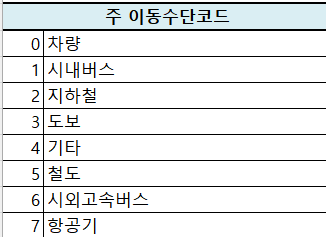

In [12]:
# 4. 이동수단 비율 피쳐 추가
def make_modal_group(data):
    if data == 0.0:
        return '차량'
    elif data in [1.0,2.0]:
        return '대중교통'
    elif data == 3.0:
        return '도보'
    elif data == 4.0:
        return '기타'
    else:
        return '장거리이동수단'

df_1['modal_nm'] = df_1['modal'].apply(make_modal_group)

# 이동수단 집계
modal_counts = df_1.groupby(['age_gender', 'modal_nm'])['od_cnts'].sum().reset_index()
# 피벗 테이블 구성
modal_pivot = modal_counts.pivot_table(index='age_gender', columns='modal_nm', values='od_cnts', aggfunc = 'mean').fillna(0).reset_index()

#비율 계산
modal_pivot['modal_total'] = modal_pivot['차량'] + modal_pivot['대중교통'] + modal_pivot['도보']+ modal_pivot['기타'] +modal_pivot['장거리이동수단']
modal_pivot['차량_비율'] = modal_pivot['차량'] / modal_pivot['modal_total']
modal_pivot['대중교통_비율'] = modal_pivot['대중교통'] / modal_pivot['modal_total']
modal_pivot['도보_비율'] = modal_pivot['도보'] / modal_pivot['modal_total']
modal_pivot['기타_비율'] = modal_pivot['기타'] / modal_pivot['modal_total']
modal_pivot['장거리이동수단_비율'] = modal_pivot['장거리이동수단'] / modal_pivot['modal_total']
#modal_pivot = modal_pivot.rename(columns={'origin_hdong_nm':'출발행정동명'})

# 원본 데이터에 추가
grouped = grouped.merge(modal_pivot[['age_gender','차량_비율', '대중교통_비율','도보_비율','기타_비율','장거리이동수단_비율']], on='age_gender', how='left')

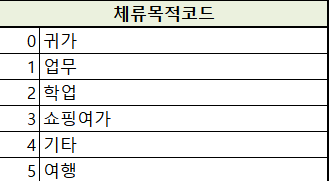

In [13]:
# 5. 방문 목적 비율 피쳐 추가
def make_purpose_group(data):
    if data == 0:
        return '귀가'
    elif data == 1:
        return '업무'
    elif data == 2:
        return '학업'
    elif data == 3:
        return '쇼핑여가'
    elif data == 4:
        return '기타'
    else:
        return '여행'

df_1['purpose'] = df_1['dest_purpose'].apply(make_purpose_group)

# 이동수단 집계
purpose_counts = df_1.groupby(['age_gender', 'purpose'])['od_cnts'].sum().reset_index()
# 피벗 테이블 구성
purpose_pivot = purpose_counts.pivot_table(index='age_gender', columns='purpose', values='od_cnts', aggfunc = 'mean').fillna(0).reset_index()

#비율 계산
purpose_pivot['purpose_total'] = purpose_pivot['귀가'] + purpose_pivot['업무'] + purpose_pivot['학업']+ purpose_pivot['쇼핑여가'] +purpose_pivot['기타'] + purpose_pivot['여행']
purpose_pivot['귀가목적_비율'] = purpose_pivot['귀가'] / purpose_pivot['purpose_total']
purpose_pivot['업무목적_비율'] = purpose_pivot['업무'] / purpose_pivot['purpose_total']
purpose_pivot['학업목적_비율'] = purpose_pivot['학업'] / purpose_pivot['purpose_total']
purpose_pivot['쇼핑여가목적_비율'] = purpose_pivot['쇼핑여가'] / purpose_pivot['purpose_total']
purpose_pivot['기타목적_비율'] = purpose_pivot['기타'] / purpose_pivot['purpose_total']
purpose_pivot['여행목적_비율'] = purpose_pivot['여행'] / purpose_pivot['purpose_total']
purpose_pivot = purpose_pivot.rename(columns={'origin_hdong_nm':'출발행정동명'})

# 원본 데이터에 추가
grouped = grouped.merge(purpose_pivot[['age_gender','귀가목적_비율', '업무목적_비율','학업목적_비율','쇼핑여가목적_비율','기타목적_비율','여행목적_비율']], on='age_gender', how='left')

In [14]:
# 6.평균이동거리 피쳐 추가
dist_avg = df_1.groupby('age_gender')['od_dist_avg'].mean().reset_index()
grouped = grouped.merge(dist_avg, on='age_gender', how='left')

# 7.동별 평균이동시간 피쳐 추가
dura_avg = df_1.groupby('age_gender')['od_duration_avg'].mean().reset_index()
grouped = grouped.merge(dura_avg, on='age_gender', how='left')

In [15]:
# 컬럼명 정리
grouped = grouped.rename(columns ={'od_dist_avg':'평균이동거리(m)','od_duration_avg':'평균이동시간(min)'})
grouped                         

,age_gender,평균_방문자수,평일방문_비율,주말방문_비율,출근시간대_비율,점심시간대_비율,오후시간대_비율,퇴근시간대_비율,저녁시간대_비율,차량_비율,...,기타_비율,장거리이동수단_비율,귀가목적_비율,업무목적_비율,학업목적_비율,쇼핑여가목적_비율,기타목적_비율,여행목적_비율,평균이동거리(m),평균이동시간(min)
0,10대_남성,10.315324,0.827110,0.172890,0.179121,0.187113,0.320088,0.182463,0.131214,0.660586,...,0.300086,0.000000,0.888969,0.000000,0.065517,0.026369,0.014946,0.004199,6966.157429,15.918957
1,10대_여성,9.490801,0.786932,0.213068,0.131763,0.114944,0.361879,0.222875,0.168539,0.727522,...,0.216375,0.000000,0.863504,0.000000,0.062261,0.057985,0.010377,0.005873,9007.889069,17.563853
2,20대_남성,7.320569,0.652548,0.347452,0.071657,0.146924,0.164838,0.308522,0.308059,0.731935,...,0.225015,0.000000,0.668426,0.089571,0.000555,0.095774,0.080822,0.064852,10033.754321,17.230769
3,20대_여성,6.252722,0.675870,0.324130,0.079385,0.126974,0.134726,0.321643,0.337271,0.701074,...,0.209095,0.000000,0.685694,0.091075,0.000622,0.139867,0.052771,0.029971,10976.912131,20.432608
4,30대_남성,6.441586,0.698714,0.301286,0.091867,0.166396,0.147745,0.301079,0.292913,0.717959,...,0.210475,0.000000,0.729191,0.129351,0.000000,0.069969,0.050107,0.021382,15922.335546,23.613508
5,30대_여성,6.694745,0.724250,0.275750,0.127853,0.168981,0.157799,0.304441,0.240925,0.670032,...,0.239694,0.000121,0.788659,0.109112,0.000000,0.067839,0.023885,0.010505,11720.582862,21.566209
6,40대_남성,8.623609,0.640436,0.359564,0.122626,0.218519,0.150935,0.272128,0.235792,0.735827,...,0.251487,0.000000,0.774672,0.169569,0.000000,0.040780,0.010320,0.004658,7792.464153,15.709518
7,40대_여성,9.298965,0.745603,0.254397,0.155230,0.198513,0.172151,0.284900,0.189206,0.717994,...,0.263125,0.000000,0.905998,0.071648,0.000000,0.020795,0.000312,0.001247,6870.229814,15.906832
8,50대_남성,6.050107,0.731954,0.268046,0.164815,0.232327,0.178710,0.239000,0.185147,0.729796,...,0.231738,0.000000,0.661538,0.203595,0.000000,0.078070,0.043412,0.013385,15662.208502,23.616481
9,50대_여성,6.556364,0.739584,0.260416,0.168771,0.191511,0.179798,0.258001,0.201918,0.715866,...,0.241982,0.000000,0.813155,0.100910,0.000000,0.061956,0.018140,0.005840,9987.614332,20.379037


In [16]:
#grouped.to_csv('석촌동_성연령_군집분석용_데이터셋.csv',index=False)